In [171]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns


import plotly.offline as pyo
import plotly.graph_objs as go

import sys

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


In [172]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('KaggleV2-May-2016.csv')



data = pd.DataFrame()
df.head()

df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [173]:
# encoding X_train and X_test
enc = OrdinalEncoder()

df[['Gender','No-show']] = enc.fit_transform(df[['Gender','No-show']])

selected_features = df[['Gender', 'Age', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism','Handcap','SMS_received']]
display(selected_features)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0.0,62,0,1,0,0,0,0
1,1.0,56,0,0,0,0,0,0
2,0.0,62,0,0,0,0,0,0
3,0.0,8,0,0,0,0,0,0
4,0.0,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0.0,56,0,0,0,0,0,1
110523,0.0,51,0,0,0,0,0,1
110524,0.0,21,0,0,0,0,0,1
110525,0.0,38,0,0,0,0,0,1


In [174]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [175]:
# defining y variable

y = df['No-show'].values

In [176]:
#creating a split (train/test)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%

[[8782   48]
 [2196   27]]
[[8785   45]
 [2191   32]]
[[8785   45]
 [2196   27]]


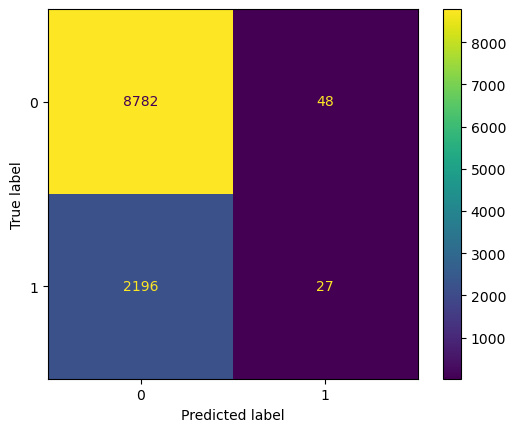

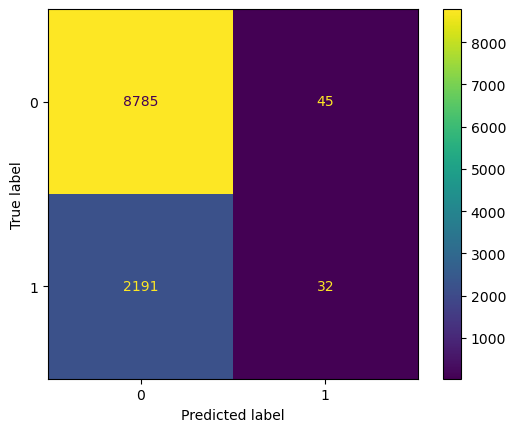

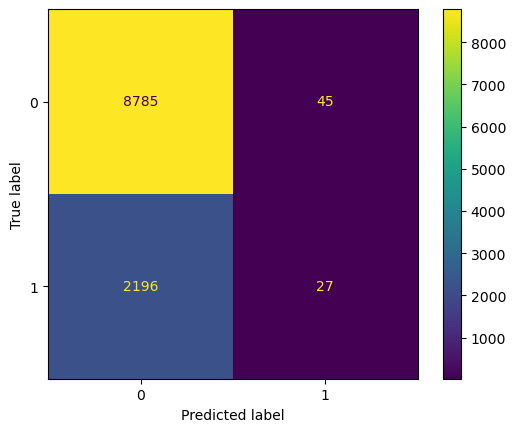

In [177]:
#training and testing the decision tree model with 3 different criterion
criteria = ["entropy", "gini", "log_loss"]
scoreDT = []
for i in criteria:
   
    model_tree = DecisionTreeClassifier(criterion = i, 
                                   max_leaf_nodes = 1000)

    model_tree.fit(X_train, y_train)

  
    y_pred_tree = model_tree.predict(X_test)

    print(confusion_matrix(y_test,y_pred_tree))
    cm = confusion_matrix(y_test, y_pred_tree)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    scoreDT.append(accuracy_score(y_test, y_pred_tree))


In [178]:
# printing all 3 Decision tree model scores (based on 3 criterion)(testing)
scoreDT

[0.7969781959648964, 0.797701981362526, 0.7972496154890075]

In [179]:
#conclusion statement
print ("Based on the above data analysis, it can be concluded that the 'gini' criterion gives the highest accuracy")

Based on the above data analysis, it can be concluded that the 'gini' criterion gives the highest accuracy


[[8721   60]
 [2249   23]]
[[8714   67]
 [2243   29]]
[[8722   59]
 [2249   23]]


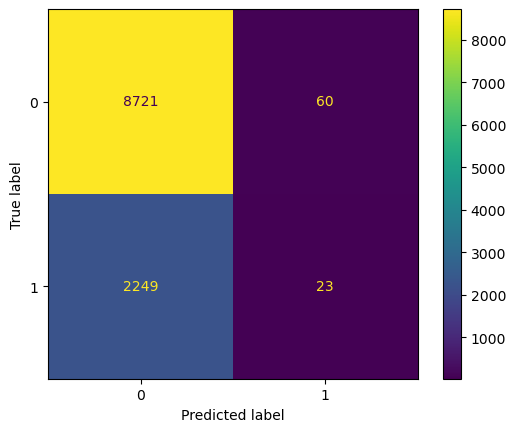

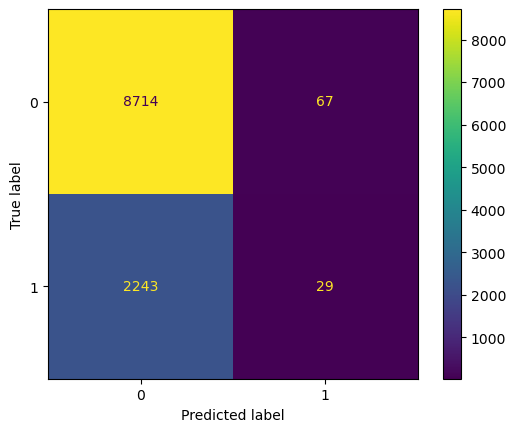

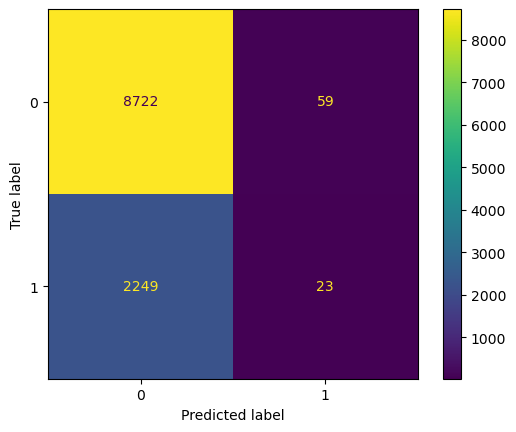

In [180]:
#creating score variable for validation (Decision tree model)
scoreDTval = []
criteria = ["entropy", "gini", "log_loss"]
#training decision tree classifier (validation)
for i in criteria:
   
    model_tree = DecisionTreeClassifier(criterion = i, 
                                   max_leaf_nodes = 1000)

    model_tree.fit(X_train, y_train)

    scoreDTval.append(accuracy_score(y_val, y_predval_tree))
#confusion matrix for Decision tree model (validation)
    y_predval_tree= model_tree.predict(X_val)

    print(confusion_matrix(y_val,y_predval_tree))
    cmval = confusion_matrix(y_val, y_predval_tree)
    cmval_display = ConfusionMatrixDisplay(cmval).plot()

In [181]:
# printing all 3 Decision tree model scores (based on 3 criterion)(validation)
scoreDTval

[0.7910974396091559, 0.7910974396091559, 0.7910069664344522]

In [182]:
# pie chart to determine which gender is missing appointments

fig = {'data': [{'type': 'pie',
                'name': "Present by Gender: Pie Chart",
                'labels': df['Gender'].value_counts().index,
                'values': df['Gender'].value_counts().values,
                 'direction': 'clockwise'}], 'layout': {'title': 'Patients by Gender'}}
                 
pyo.iplot(fig)

In [183]:
# decision tree diagram code
#fig, axes = plt.subplots(nrows= 1, ncols =1, figsize =(12,12), dpi = 600)
#tree.plot_tree(model_tree);

In [184]:
fig = {'data': [{'type': 'pie',
                'name': "Show or no show on appointment date",
                'labels': df['No-show'].value_counts().index,
                'values': df['No-show'].value_counts().values,
                'direction': 'clockwise'}], 'layout': {'title': 'Show or no show on appointment date'}}
                 
pyo.iplot(fig)

In [185]:
#training random forest model for testing
scores = []
    
for i in range(1,20):
    model = RandomForestClassifier(random_state = 0, criterion = "entropy" , n_estimators = i)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
  

    
    

In [186]:
#training random forest model for validation
score = []
for i in range(1,20):
    model = RandomForestClassifier(random_state = 0, criterion = "entropy" , n_estimators = i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_val)
    
    score.append(accuracy_score(y_val, y_predict))

[[8749   81]
 [2187   36]]


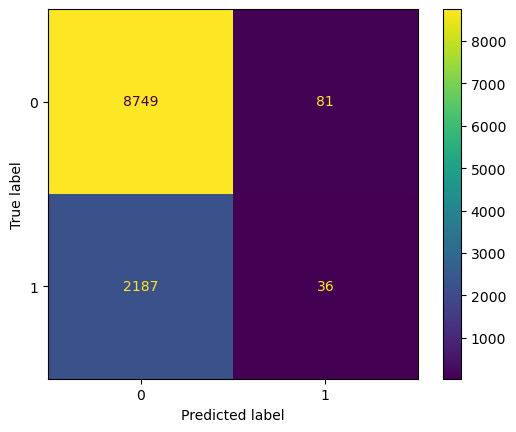

In [187]:
#confusion matrix testing
print(confusion_matrix(y_test,y_pred))
cm1 = confusion_matrix(y_test, y_pred)
cm1_display = ConfusionMatrixDisplay(cm1).plot()

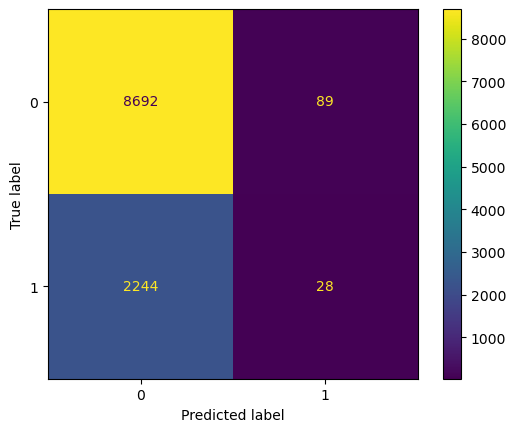

In [188]:
#confusion matrix validation
(confusion_matrix(y_val,y_pred))
cm1val = confusion_matrix(y_val, y_pred)
cm1val_display = ConfusionMatrixDisplay(cm1val).plot()

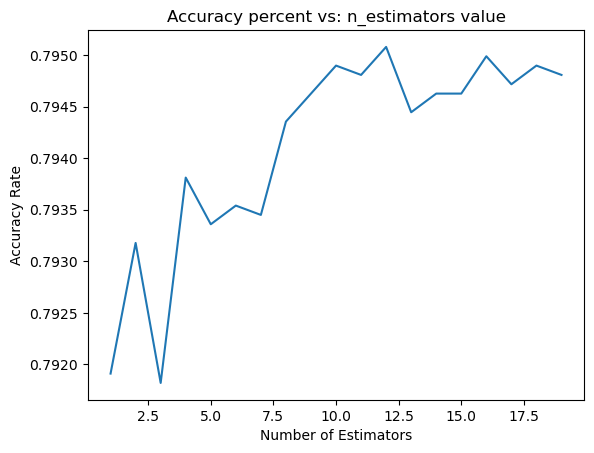

In [189]:
#plotting accuracy percentage vs n_estimators (testing)


plt.plot(range(1,20), scores)
plt.title("Accuracy percent vs: n_estimators value")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Rate")

plt.show()

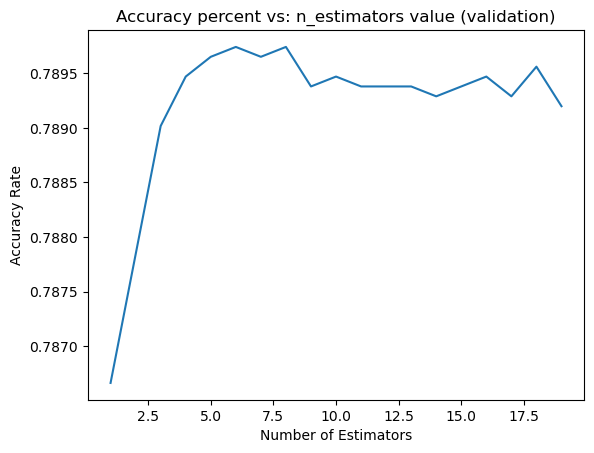

In [190]:
#plotting accuracy percentage vs n_estimators (validation)


plt.plot(range(1,20), score)
plt.title("Accuracy percent vs: n_estimators value (validation)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Rate")

plt.show()

In [191]:
# max accuracy score (Random Forest model)(validation)
max (score)

0.7897403419886003

In [192]:
# max accuracy score (DecisionTree model)(validation)
max (scoreDTval)

0.7910974396091559

In [193]:
#FINAL CONCLUSION

print ("Based on above models, accuracy scores and visualizations; the Decision Tree model with 'gini' criterion gives highest accuracy")

Based on above models, accuracy scores and visualizations; the Decision Tree model with 'gini' criterion gives highest accuracy
